In [257]:
# allow matplotlib graphics to display in the notebook
%matplotlib inline
import matplotlib.pyplot

# for image dimension manipulation
import numpy

# import validation methods from scikit-learn
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# import the dataset and neural network layers from keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D

from keras.layers import Activation
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

In [258]:
# "MNIST is a famous dataset of images of handwritten numbers."

# constants to describe the MNIST images
NUM_ROWS = 28 
NUM_COLUMNS = 28
NUM_COLORS = 1 # grayscale
IMG_SHAPE = (NUM_ROWS, NUM_COLUMNS, NUM_COLORS)

# constant to describe the MNIST output labels
# there are ten different numbers, 0-9
NUM_CLASSES = 10

In [259]:
# load the data
((images_train, labels_train), (images_test, labels_test)) = mnist.load_data()

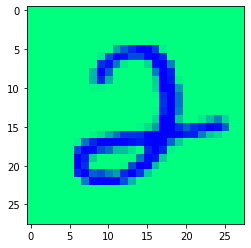

In [260]:
# show a particular image
matplotlib.pyplot.imshow(images_train[16], cmap='winter_r')

In [261]:
labels_train[16]

2

In [262]:
# CREATING MODEL

model = Sequential()

# add convolutional layers
model.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=8, kernel_size=3, strides=2, padding='same'))
model.add(Conv2D(filters=8, kernel_size=3, strides=2, padding='same'))

# dense layers to consolidate information
model.add(Flatten())
model.add(Dense(units=8, activation='tanh'))

# output layer to make the final decision on which number it is
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

In [263]:
# TRAINING MODEL

# keras requires a color dimension, so we need to expand each image to have one
images_3d_train = numpy.expand_dims(images_train, axis=3)

# the labels need to be one-hot encoded, to match the ten outputs of our model
labels_onehot_train = to_categorical(labels_train)

# set up the model to be ready for training
model.compile(optimizer=SGD(), loss='categorical_crossentropy')

# fit the model to the training data
model.fit(images_3d_train, labels_onehot_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7148
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2790


In [264]:
# VALIDATION W/ TEST SET

# same reason as previous cell
images_3d_test = numpy.expand_dims(images_test, axis=3)

# get the predictions from the model (get the probability of each number for each image)
predictions_test_onehot = model.predict(images_3d_test)

# get the index that has the highest probability (what we actually care about)
# the index just happens to be the same as the number
predictions_test = numpy.argmax(predictions_test_onehot, axis=1)

# this will be used to check for overfitting
predictions_training_onehot = model.predict(images_3d_train)
predictions_training = numpy.argmax(predictions_training_onehot, axis=1)

In [265]:
# get accuracy
print(f"test accuracy: {accuracy_score(y_true=labels_test, y_pred=predictions_test)}")
print(f"training accuracy: {accuracy_score(y_true=labels_train, y_pred=predictions_training)}")

test accuracy: 0.6253
training accuracy: 0.6143833333333333


In [266]:
# get precision, recall, f-score, and number of examples of each digit
(precision, recall, f_score, num_examples) = precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test)
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f score: {f_score}")
print(f"num examples of each num: {num_examples}")

precision: [0.79623824 0.49673531 0.85884692 0.71377672 0.69402229 0.4691358
 0.85254989 0.68495182 0.42251223 0.44386423]
recall: [0.77755102 0.87136564 0.41860465 0.5950495  0.69755601 0.17040359
 0.80271399 0.89883268 0.26591376 0.67393459]
f score: [0.78678369 0.63275752 0.56286645 0.64902808 0.69578466 0.25
 0.82688172 0.77745057 0.32640202 0.53522235]
num examples of each num: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


## Exercise: Tuning the model to produce better results.

I was able to increase accuracy from 0.6253 to 0.7927 by adding a dropout layer, changing the number of filters from 8 to 12, and using Adam as the optimizer instead of SGD.

Generally, adding additional conv layers made the model perform worse.

In [267]:
# CREATING NEW MODEL

new_model = Sequential()

# add convolutional layers
new_model.add(Conv2D(input_shape=IMG_SHAPE,
                 filters=12, kernel_size=3, strides=2, padding='same')) # 12 filters instead of 8
model.add(Dropout(0.15)) # added dropout layer
new_model.add(Conv2D(filters=12, kernel_size=3, strides=2, padding='same'))

# adding additional layers made the model perform worse
# new_model.add(Conv2D(filters=12, kernel_size=3, strides=2, padding='same'))

# dense layers to consolidate information
new_model.add(Flatten())
new_model.add(Dense(units=12, activation='tanh'))

# output layer to make the final decision on which number it is
new_model.add(Dense(units=NUM_CLASSES, activation='softmax'))

In [268]:
# TRAINING NEW MODEL

# set up the new model to be ready for training
new_model.compile(optimizer=Adam(), loss='categorical_crossentropy')

# fit the new model to the training data
new_model.fit(images_3d_train, labels_onehot_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1978
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7290


In [269]:
# VALIDATION OF NEW MODEL W/ TEST SET

# get the predictions from the model (get the probability of each number for each image)
new_predictions_test_onehot = new_model.predict(images_3d_test)

# get the index that has the highest probability (what we actually care about)
# the index just happens to be the same as the number
new_predictions_test = numpy.argmax(new_predictions_test_onehot, axis=1)

# this will be used to check for overfitting
new_predictions_training_onehot = new_model.predict(images_3d_train)
new_predictions_training = numpy.argmax(new_predictions_training_onehot, axis=1)

In [270]:
# get accuracy
print(f"test accuracy: {accuracy_score(y_true=labels_test, y_pred=new_predictions_test)}")
print(f"training accuracy: {accuracy_score(y_true=labels_train, y_pred=new_predictions_training)}")

# get precision, recall, f-score, and number of examples of each digit
(new_precision, new_recall, new_f_score, new_num_examples) = precision_recall_fscore_support(y_true=labels_test, y_pred=predictions_test)
print(f"precision: {new_precision}")
print(f"recall: {new_recall}")
print(f"f score: {new_f_score}")
print(f"num examples of each num: {new_num_examples}")

test accuracy: 0.7927
training accuracy: 0.7901666666666667
precision: [0.79623824 0.49673531 0.85884692 0.71377672 0.69402229 0.4691358
 0.85254989 0.68495182 0.42251223 0.44386423]
recall: [0.77755102 0.87136564 0.41860465 0.5950495  0.69755601 0.17040359
 0.80271399 0.89883268 0.26591376 0.67393459]
f score: [0.78678369 0.63275752 0.56286645 0.64902808 0.69578466 0.25
 0.82688172 0.77745057 0.32640202 0.53522235]
num examples of each num: [ 980 1135 1032 1010  982  892  958 1028  974 1009]
